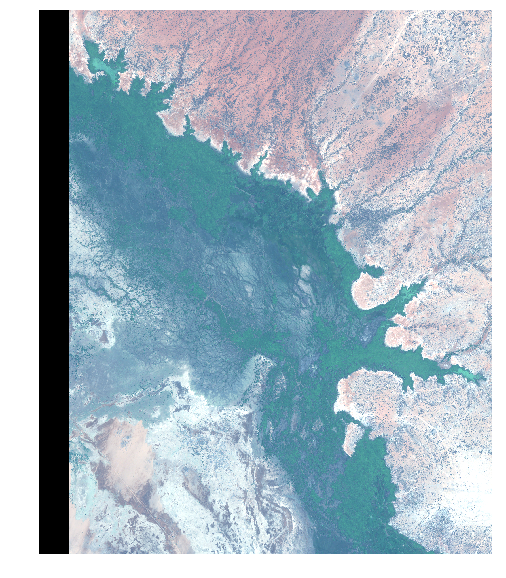

In [5]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '103001005E3DBB00')
bbox = env.inputs.get('bbox', '42.07995414733887, 4.923529104450838, 42.114200592041016, 4.964660055785657')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

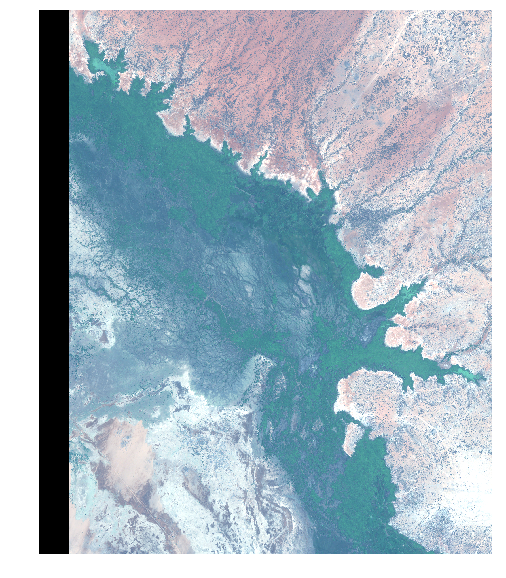

In [4]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '103001005E3DBB00')
bbox = env.inputs.get('bbox', '42.07995414733887, 4.923529104450838, 42.114200592041016, 4.964660055785657')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

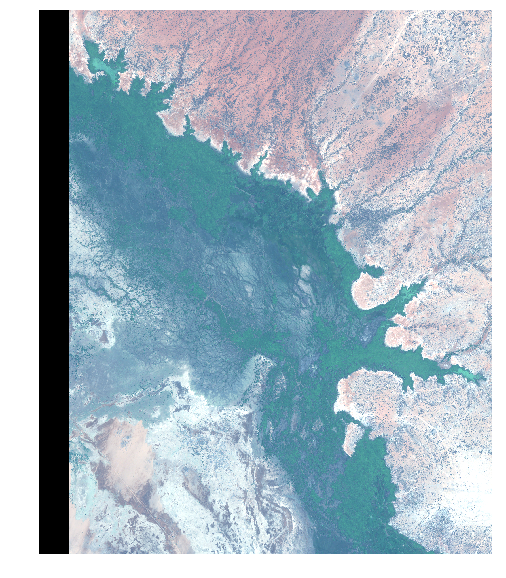

In [3]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '103001005E3DBB00')
bbox = env.inputs.get('bbox', '42.07995414733887, 4.923529104450838, 42.114200592041016, 4.964660055785657')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

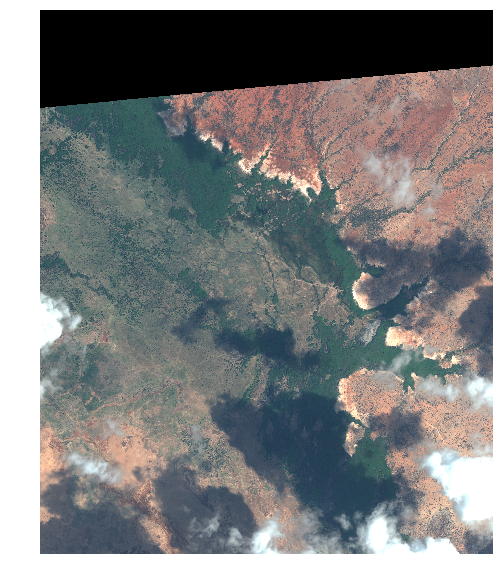

In [2]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '1030010050149900')
bbox = env.inputs.get('bbox', '42.07995414733887, 4.923529104450838, 42.114200592041016, 4.964660055785657')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

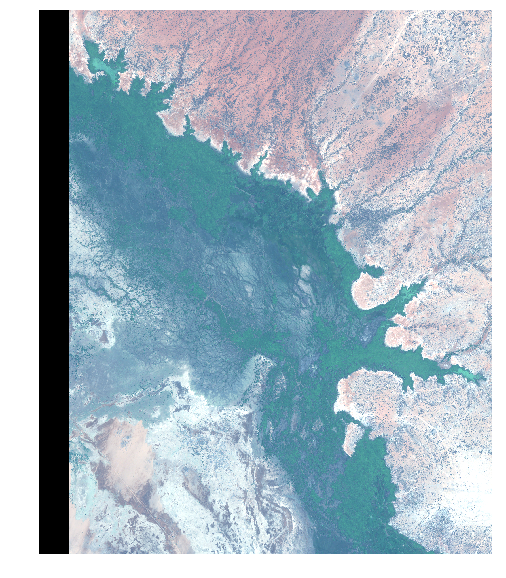

In [1]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '103001005E3DBB00')
bbox = env.inputs.get('bbox', '42.07995414733887, 4.923529104450838, 42.114200592041016, 4.964660055785657')

image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")))
image.plot(w=10, h=10)

# Deep Water Tables Project:
## 1. Create Satellite Water Tables in Selected Regions

This is the first notebook in Exploring Underground Water Tables Mapping for Borehole Irrigation in North/East Africa.
Part-1

The project will look at some pinpoint area in Ethopia and Southern Sudan using DigitalGlobe Satellite WorldView 3 

First, import all the necessary modules.

We need to streamline our AOI to a further small strip using simple bounding box as shwon below

In [11]:
bbox = [42.08, 4.924, 42.114, 4.965]


In [12]:
from gbdxtools import Interface

from datetime import datetime
from dateutil.relativedelta import relativedelta
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd

gbdx = Interface()

Next, set up a few parameters. We ran this once each for 2016 and 2017. 

To search for image strips, we'll define a helper function that uses the GBDX APIs to find an image. It uses the bounding box and a type of satellite (DigitalGlobe operates multiple satellites e.g. WorldView 3)API:

Now let's find some records using the WorldView-3 satellite. We use the helper function we just defined to search using the bbox we defined. From the records returned, we can find the catalogue ID, and as an example, print the 4th ID we have. Each ID refers to an image strip, described at the top of this notebook: Please note that we as follow these step uisng the GBDX tutorial example while focusing on our AOI

In [8]:
records = search_unordered(bbox, 'WV02')
ids = [r['properties']['attributes']['catalogID'] for r in records]
print(ids[3])

Helper function write GeoJSON features to a GeoJSON file.

In [9]:
def order(img_id):
    order = gbdx.Task("Auto_Ordering", cat_id=img_id)
    order.impersonation_allowed = True
    wf = gbdx.Workflow([order])
    wf.execute()
    return wf

This is the main cell. For each hemisphere, in 20 degree longitude chunks, build a vector services query, send it to the filter function